# Thompson Sampling

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Importing the Dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

In [3]:
N = 10000
d = 10
ads_select = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_select.append(ad)
    rewards = dataset.values[n, ad]
    if (rewards == 1):
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_rewards = total_rewards + rewards

### Visualising the result - Histogram

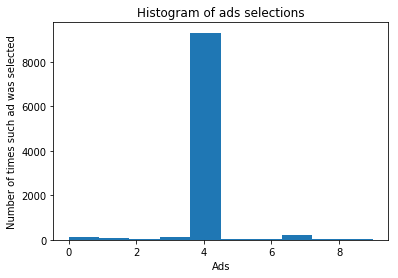

In [4]:
plt.hist(ads_select)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times such ad was selected')
plt.show()

In [5]:
print(total_rewards)

2589
